# Weather Clustering
This project combines Principal Component Analysis (PCA) for dimensionality reduction with K-means clustering to cluster weather data based on multiple attributes. It provides a structured way to analyze and interpret patterns in weather conditions across different locations and seasons.

The data from [Kaggle](https://www.kaggle.com/datasets/nikhil7280/weather-type-classification/code)

# Setup

## Imports

In [34]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

## Load Data

In [35]:
data = pd.read_csv('weather_classification_data.csv')

# EDA
We will explore the data set itself, look at the data types, look at the unique values, and visualize the realationships between the data. 

In [36]:
data.head()

Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0         14.0        73         9.5               82.0  partly cloudy   
1         39.0        96         8.5               71.0  partly cloudy   
2         30.0        64         7.0               16.0          clear   
3         38.0        83         1.5               82.0          clear   
4         27.0        74        17.0               66.0       overcast   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2  Winter              3.5    inland   
1               1011.43         7  Spring             10.0    inland   
2               1018.72         5  Spring              5.5  mountain   
3               1026.25         7  Spring              1.0   coastal   
4                990.67         1  Winter              2.5  mountain   

  Weather Type  
0        Rainy  
1       Cloudy  
2        Sunny  
3        Sunny  
4        Rainy

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [38]:
data.describe()

Temperature      Humidity    Wind Speed  Precipitation (%)  \
count  13200.000000  13200.000000  13200.000000       13200.000000   
mean      19.127576     68.710833      9.832197          53.644394   
std       17.386327     20.194248      6.908704          31.946541   
min      -25.000000     20.000000      0.000000           0.000000   
25%        4.000000     57.000000      5.000000          19.000000   
50%       21.000000     70.000000      9.000000          58.000000   
75%       31.000000     84.000000     13.500000          82.000000   
max      109.000000    109.000000     48.500000         109.000000   

       Atmospheric Pressure      UV Index  Visibility (km)  
count          13200.000000  13200.000000     13200.000000  
mean            1005.827896      4.005758         5.462917  
std               37.199589      3.856600         3.371499  
min              800.120000      0.000000         0.000000  
25%              994.800000      1.000000         3.000000  
50%             1007.650000      3.000000         5.000000  
75%             1016.772500      7.000000         7.500000  
max             1199.210000     14.000000        20.000000

In [39]:
data.nunique()

Temperature              126
Humidity                  90
Wind Speed                97
Precipitation (%)        110
Cloud Cover                4
Atmospheric Pressure    5456
UV Index                  15
Season                     4
Visibility (km)           41
Location                   3
Weather Type               4
dtype: int64

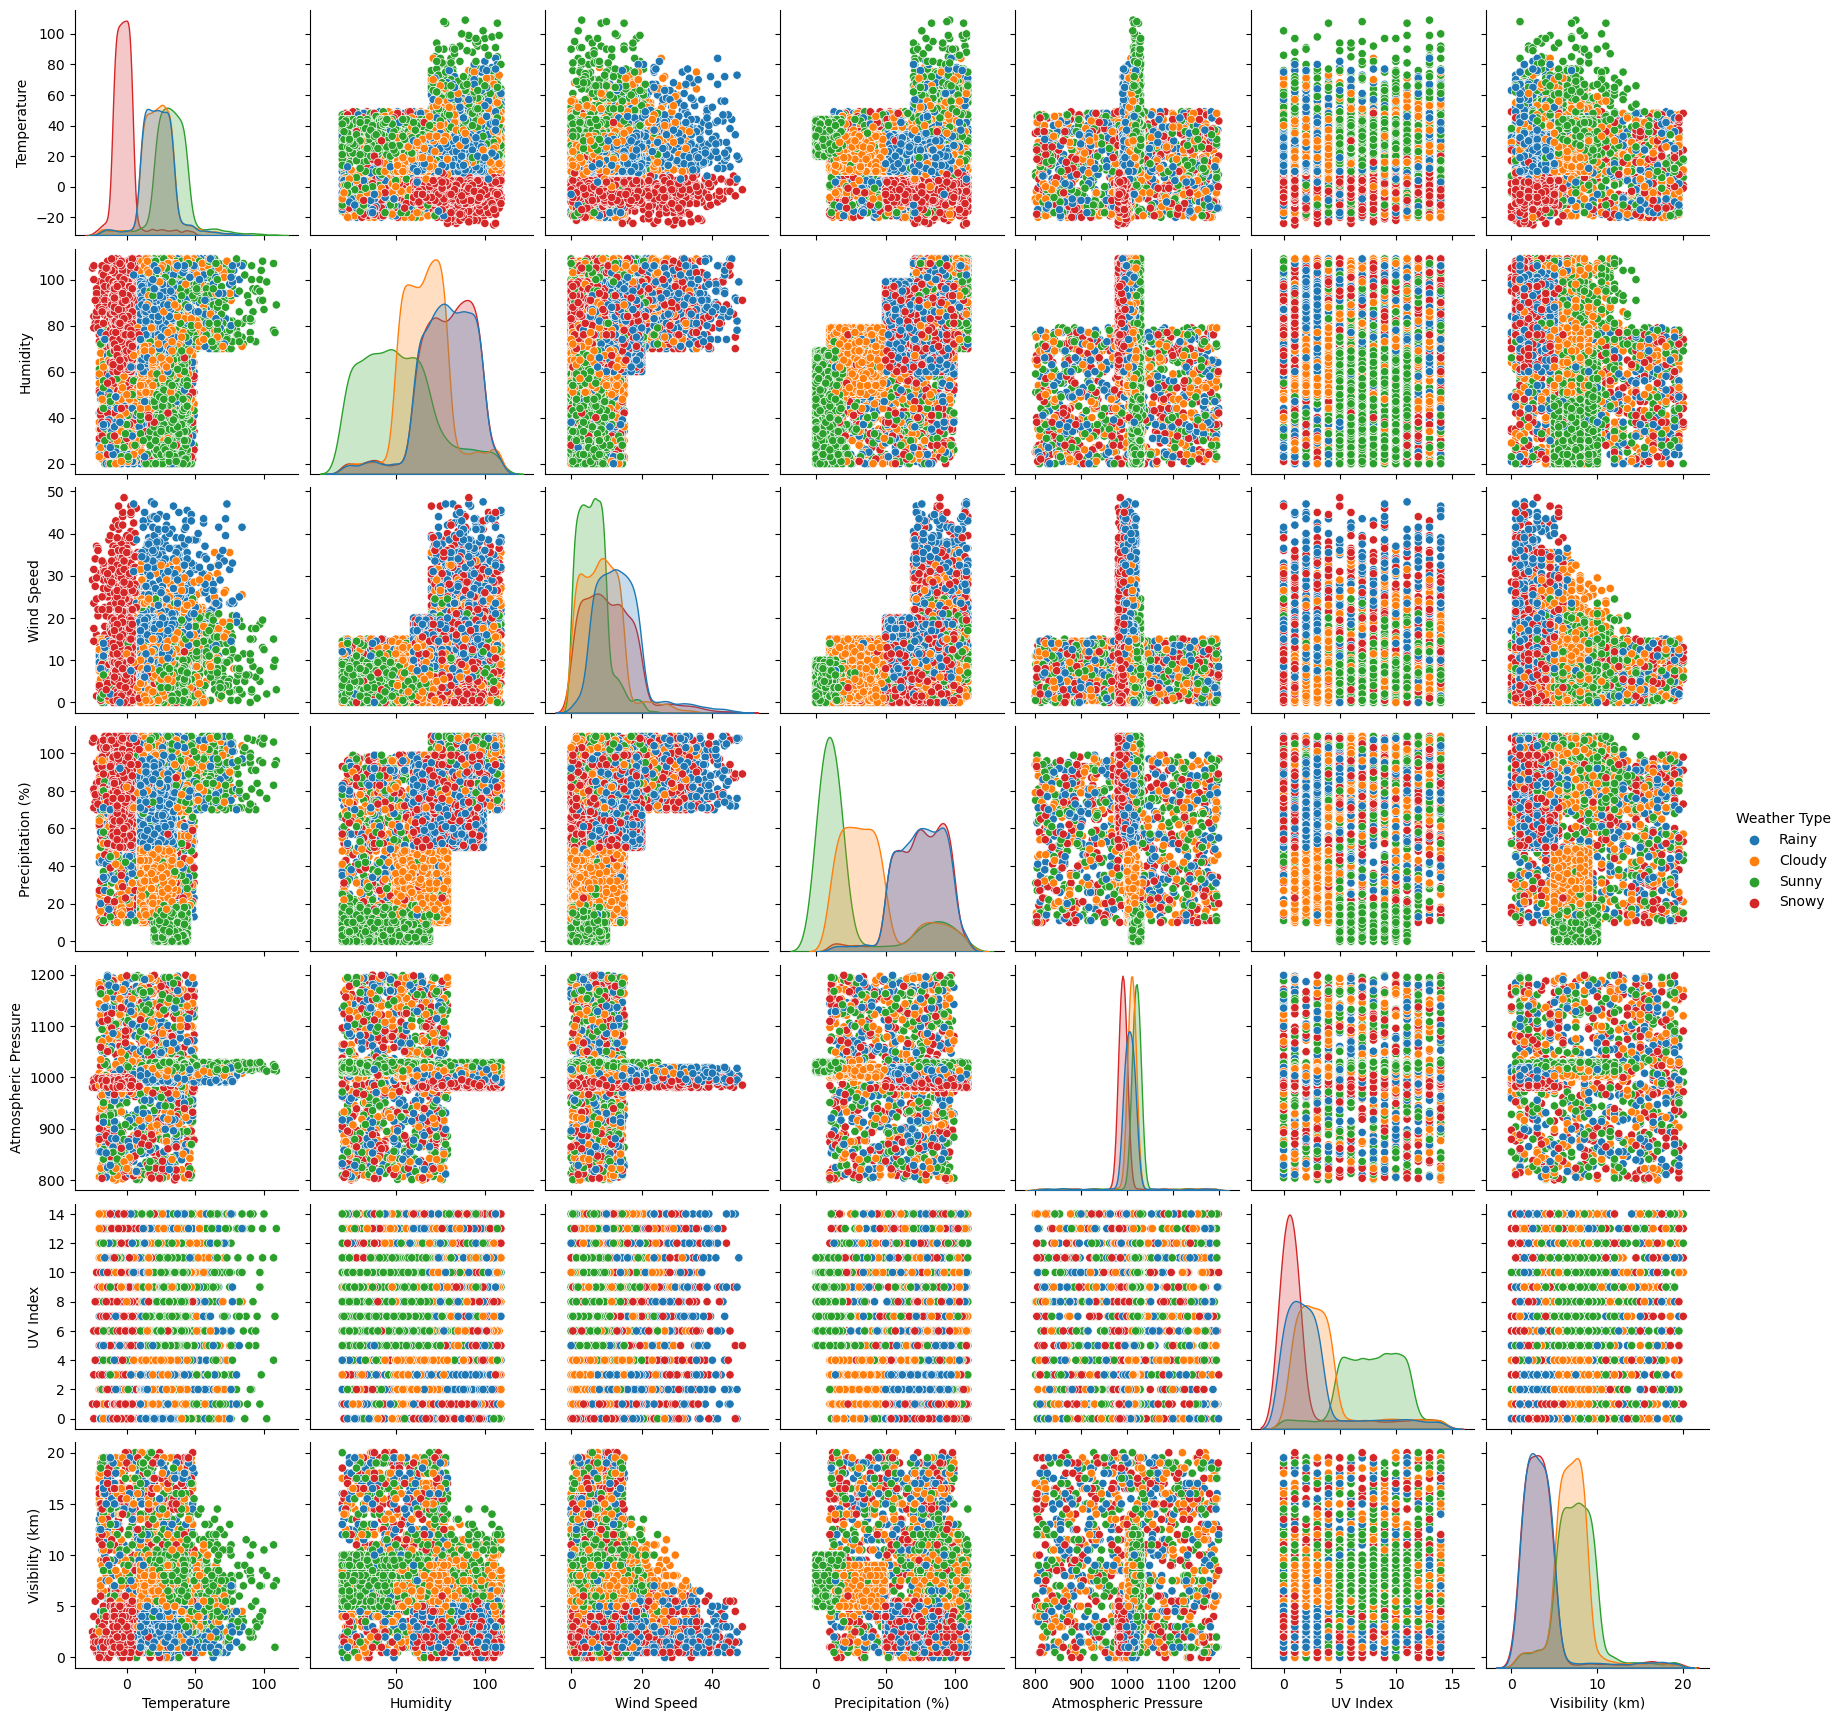

In [41]:
# Pairplot to see pairwise relationships
sns.pairplot(data, hue='Weather Type')
plt.show()

In [69]:
non_numeric_columns = data.select_dtypes(exclude=[np.number]).columns
numeric_columns = data.select_dtypes(include=[np.number]).columns
print("Non-numeric columns:", non_numeric_columns)
print("Numeric columns:", numeric_columns)

Non-numeric columns: Index(['Cloud Cover', 'Season', 'Location', 'Weather Type'], dtype='object')
Numeric columns: Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Atmospheric Pressure', 'UV Index', 'Visibility (km)'],
      dtype='object')


Non-numeric columns: Index(['Cloud Cover', 'Season', 'Location', 'Weather Type'], dtype='object')


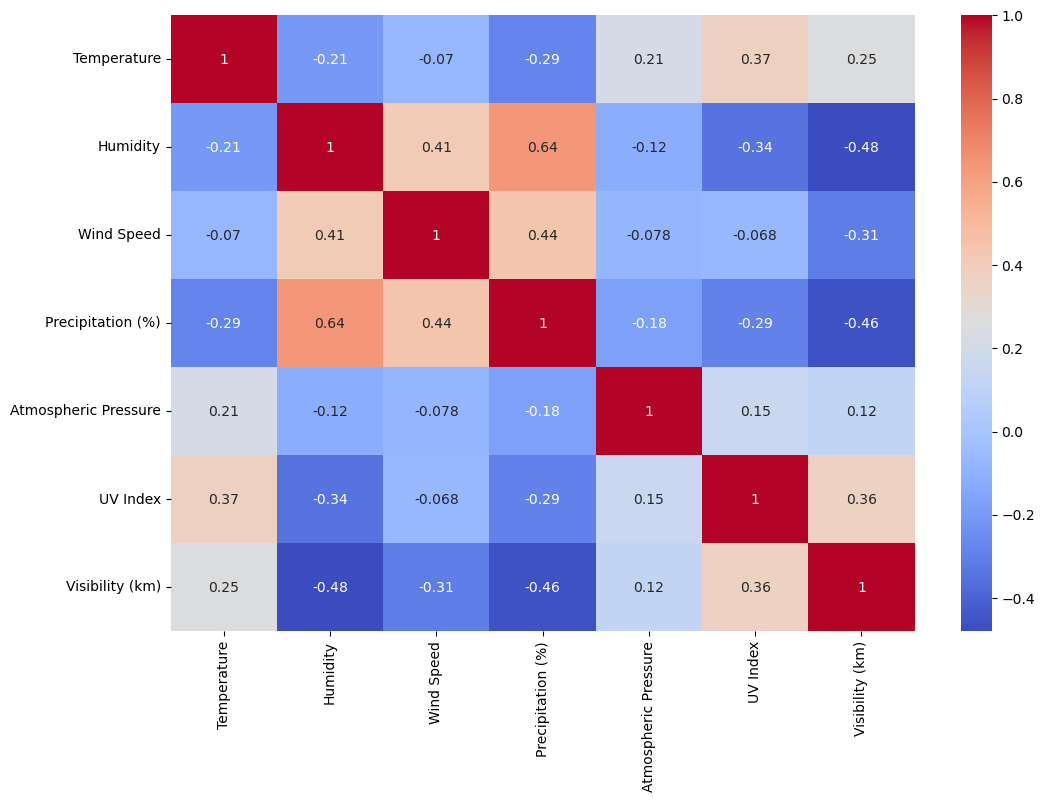

In [68]:
# Drop non-numeric columns
data_numeric = data.drop(columns=non_numeric_columns)

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data_numeric.corr(), annot=True, cmap='coolwarm')
plt.show()

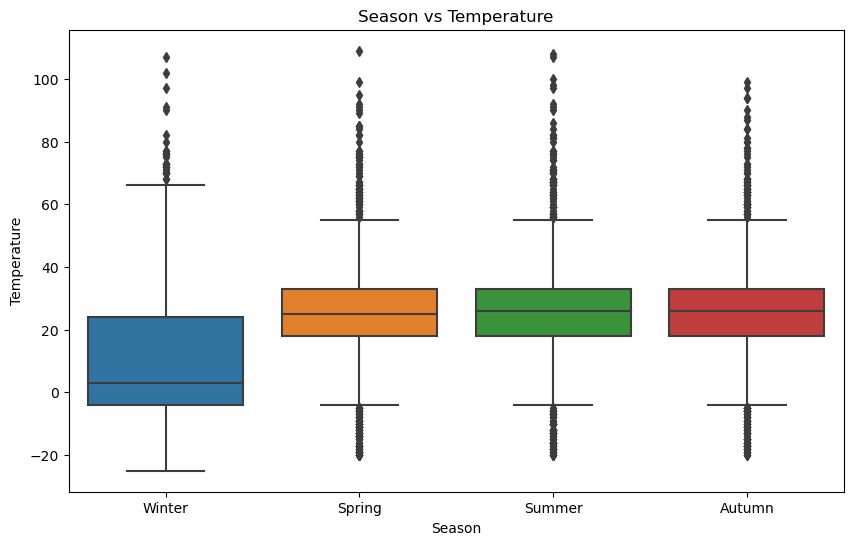

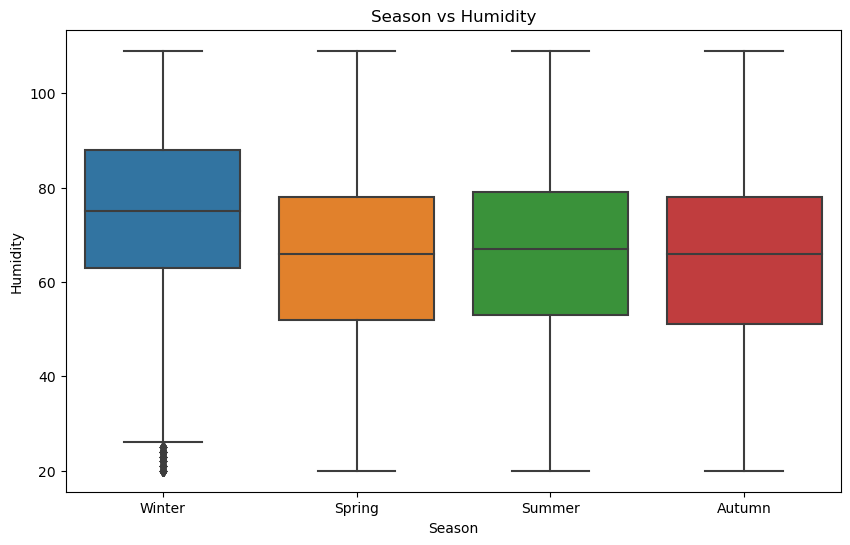

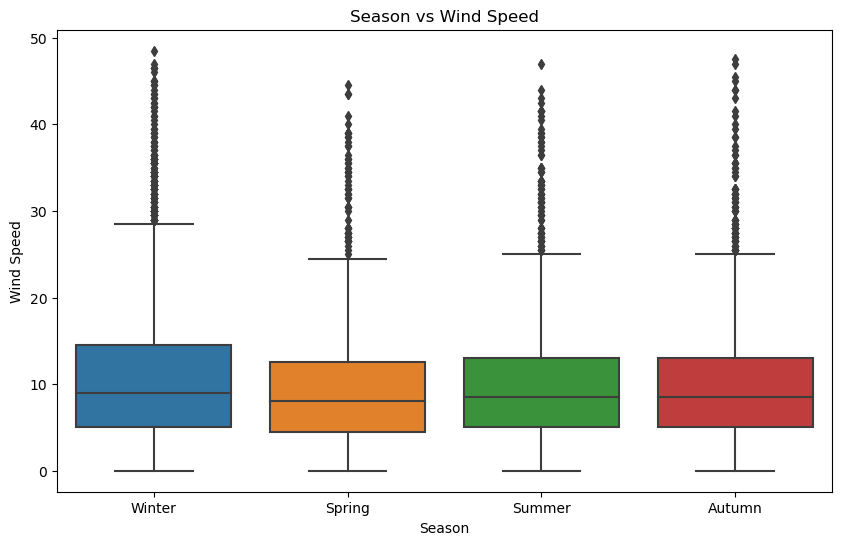

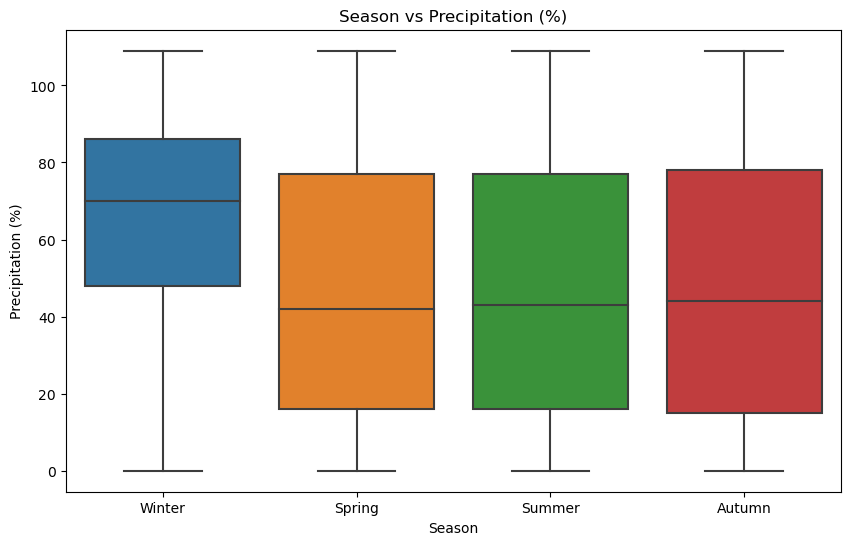

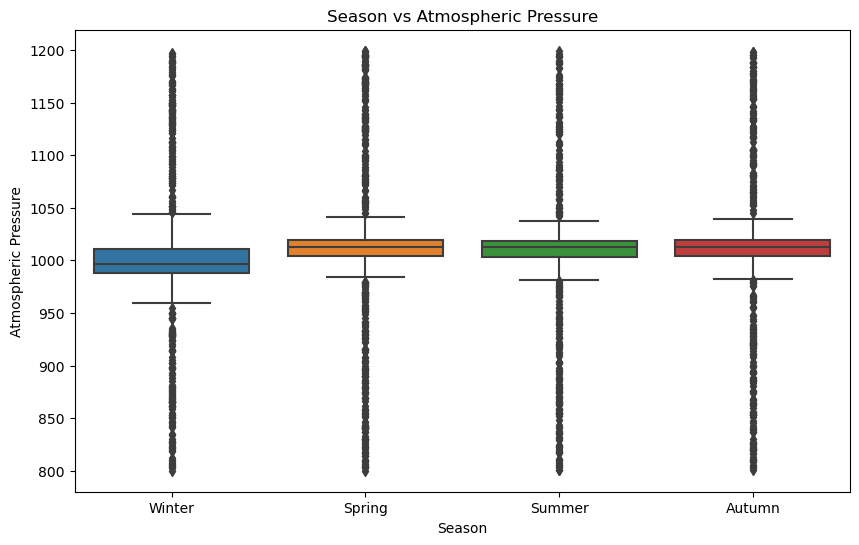

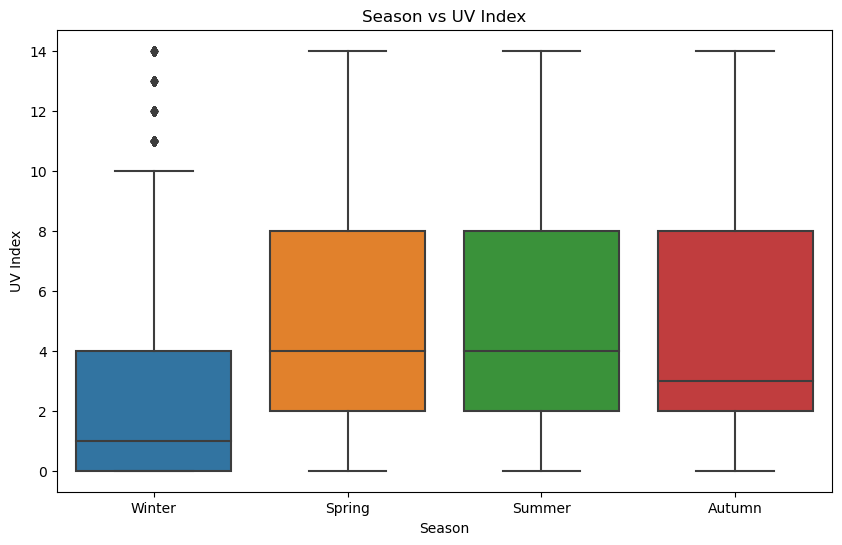

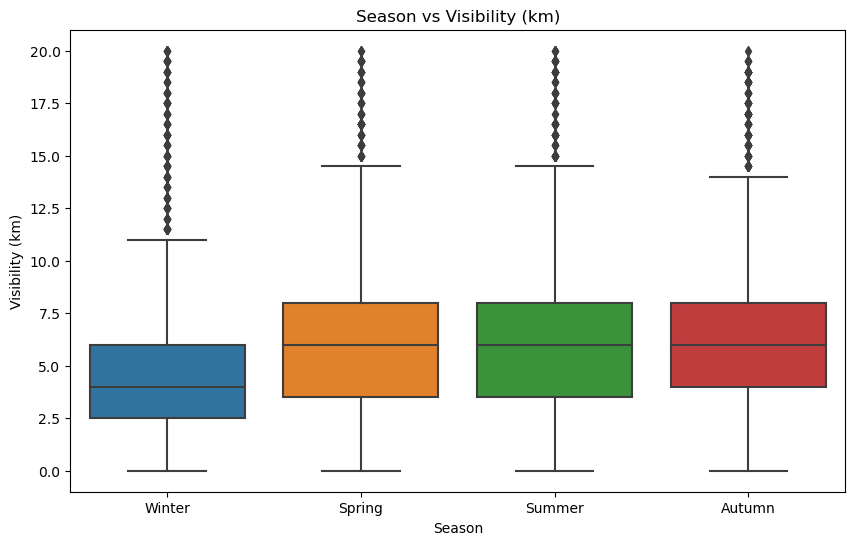

<Figure size 640x480 with 0 Axes>

In [64]:
# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
for feat in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Season', y=feat, data=data)
    plt.title(f'Season vs {feat}')
    plt.show()
plt.tight_layout()

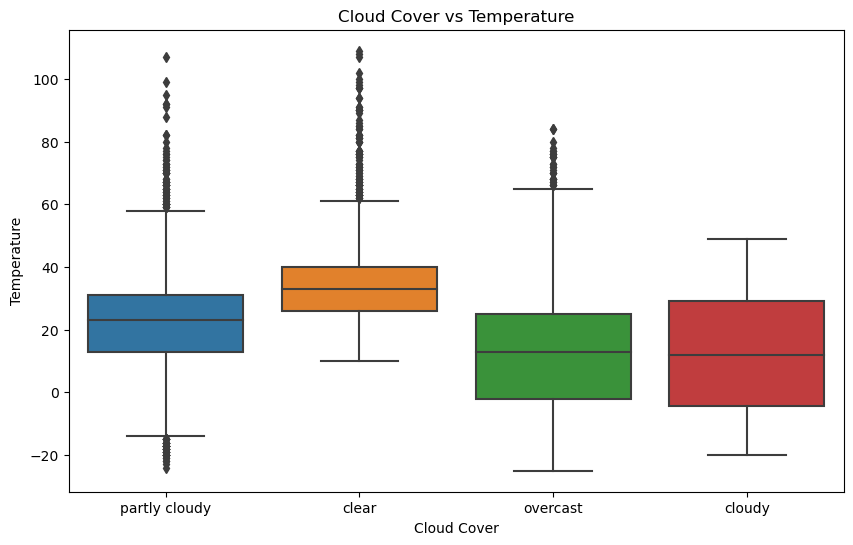

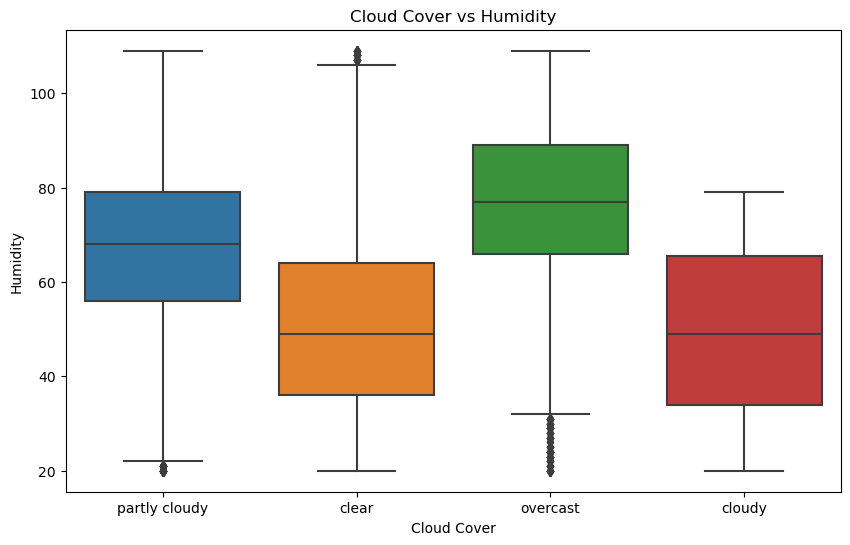

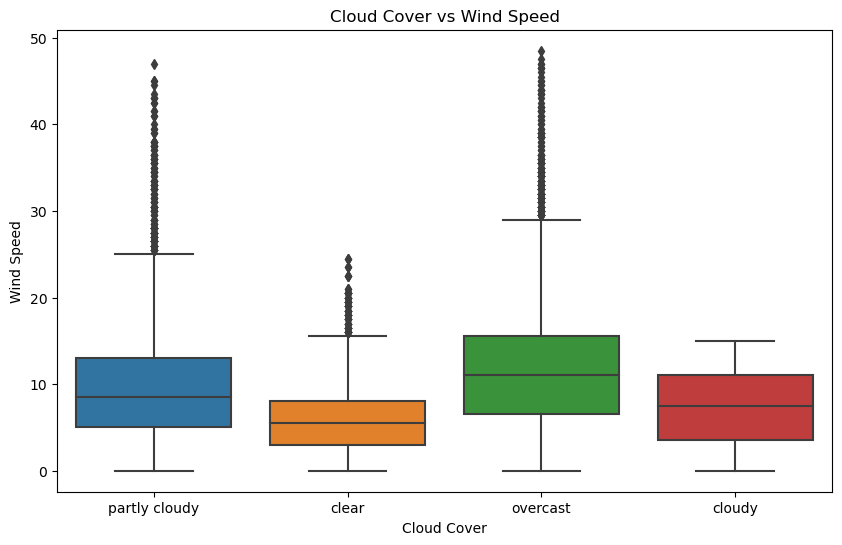

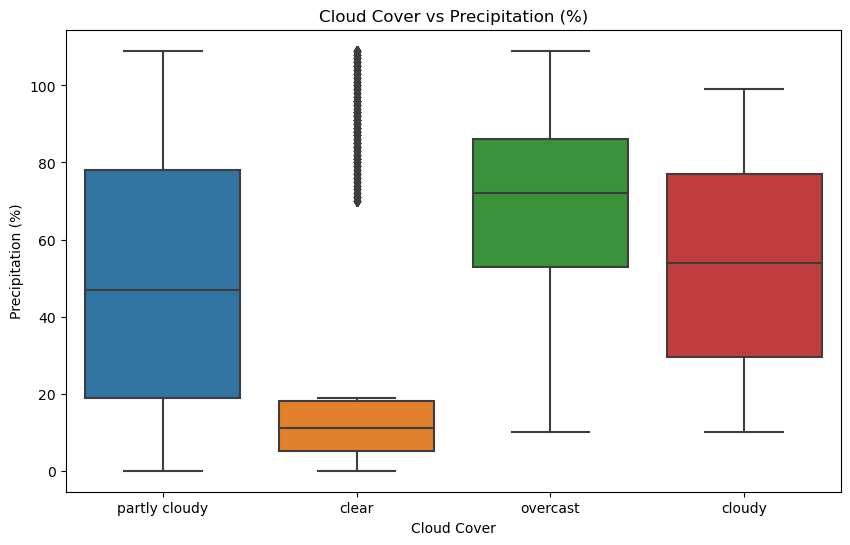

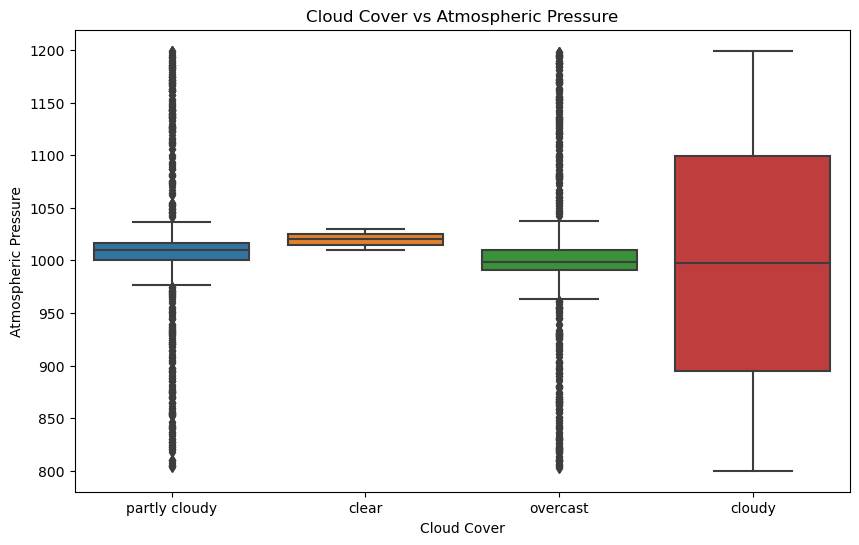

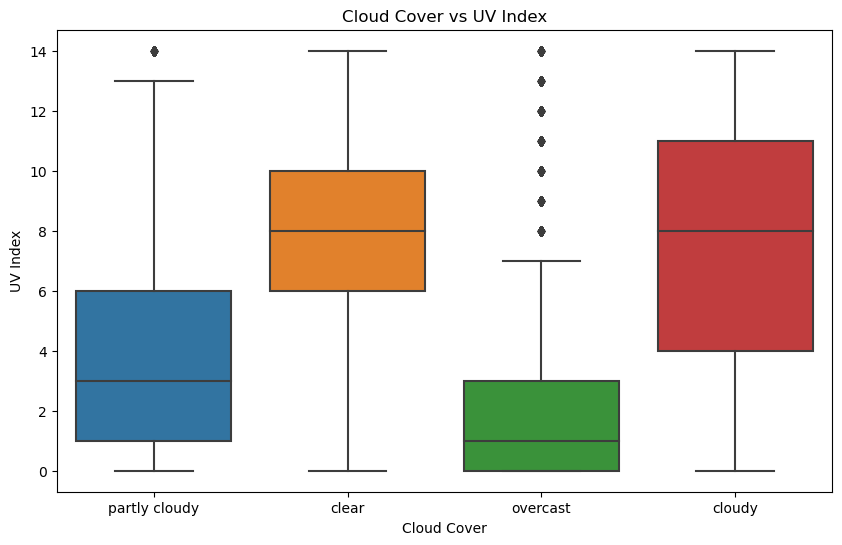

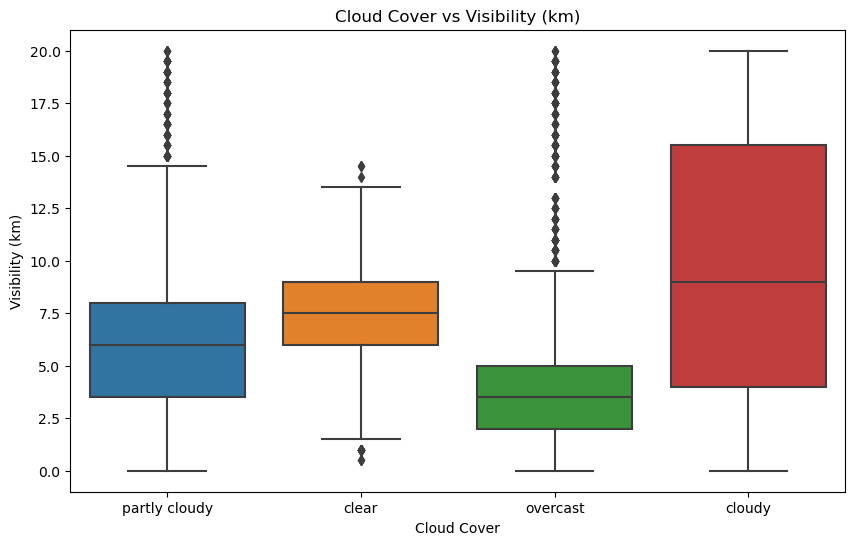

<Figure size 640x480 with 0 Axes>

In [65]:
# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
for feat in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cloud Cover', y=feat, data=data)
    plt.title(f'Cloud Cover vs {feat}')
    plt.show()
plt.tight_layout()

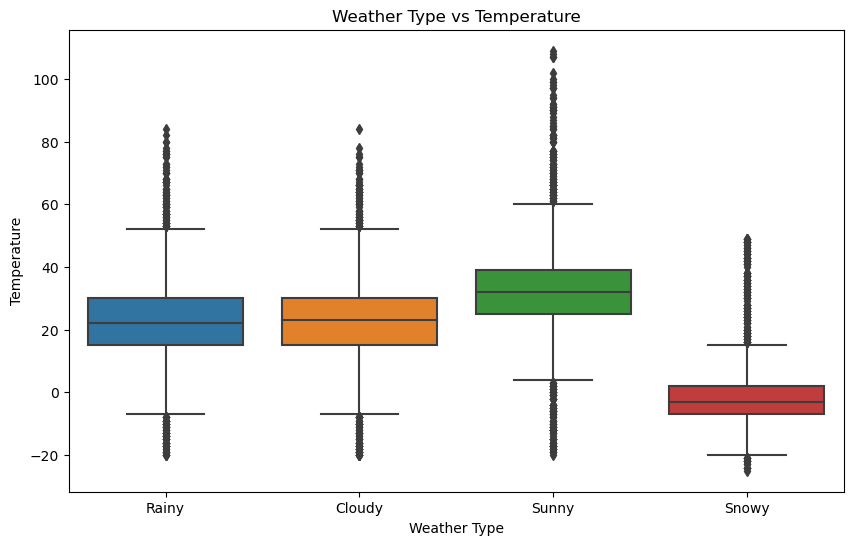

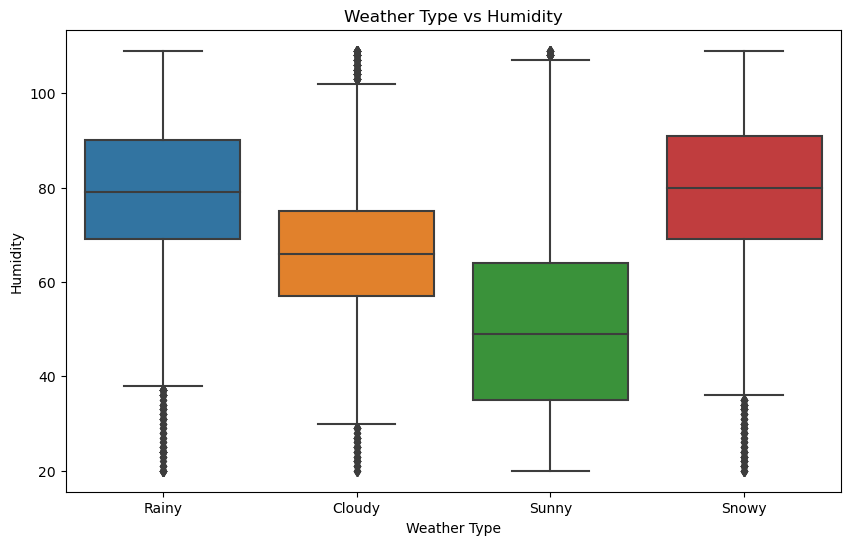

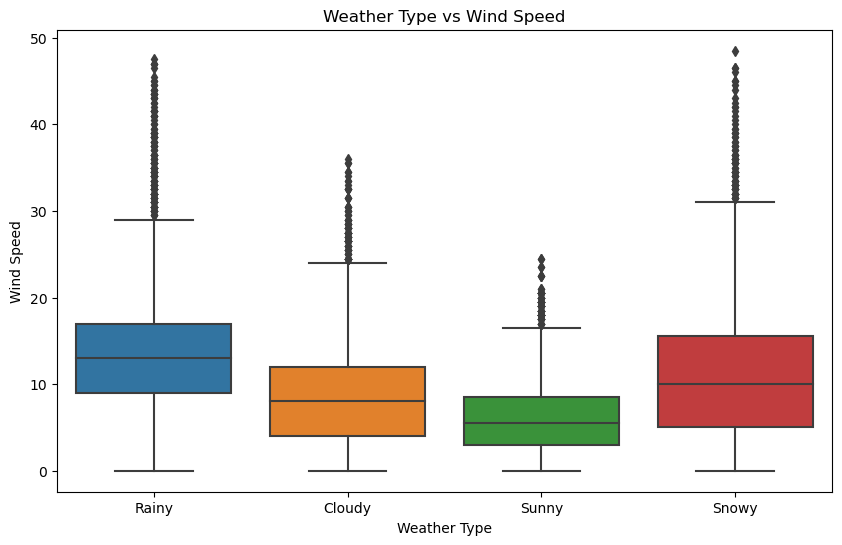

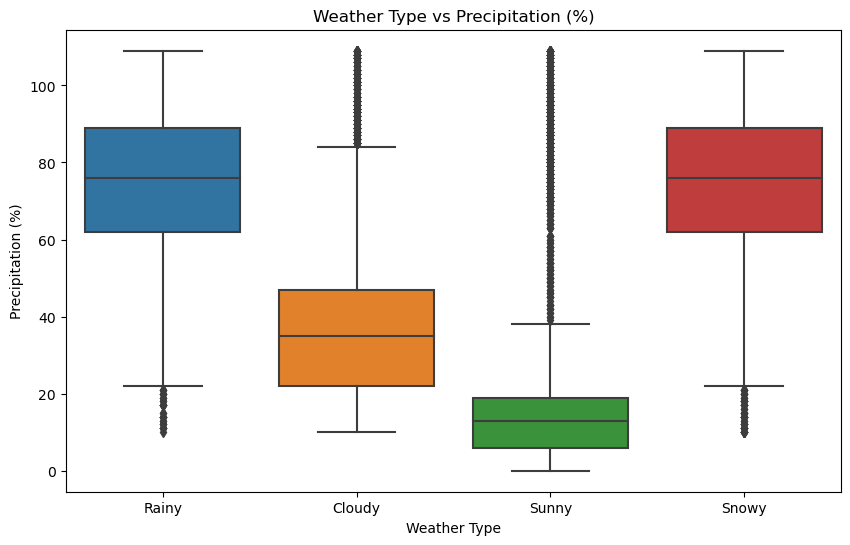

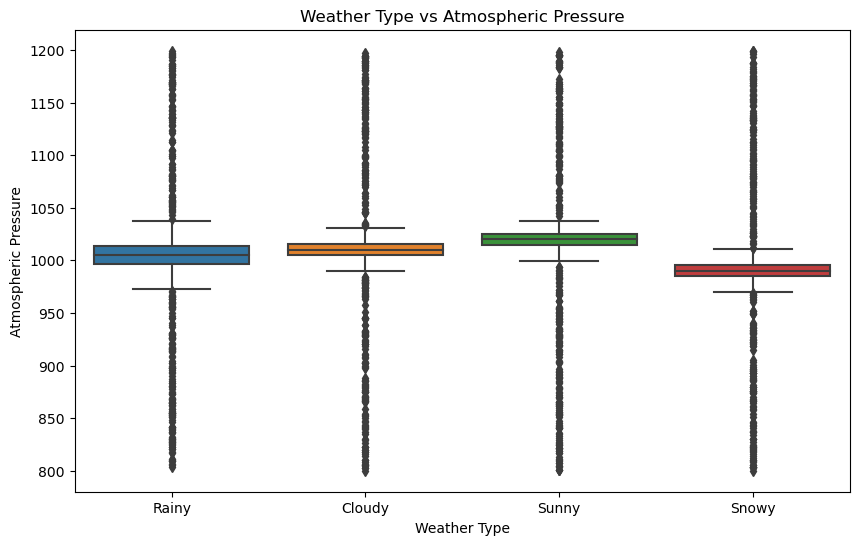

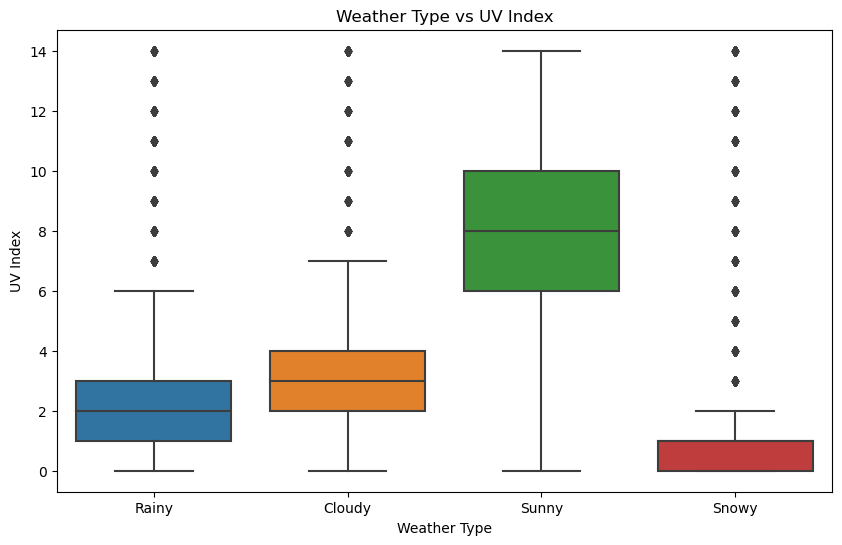

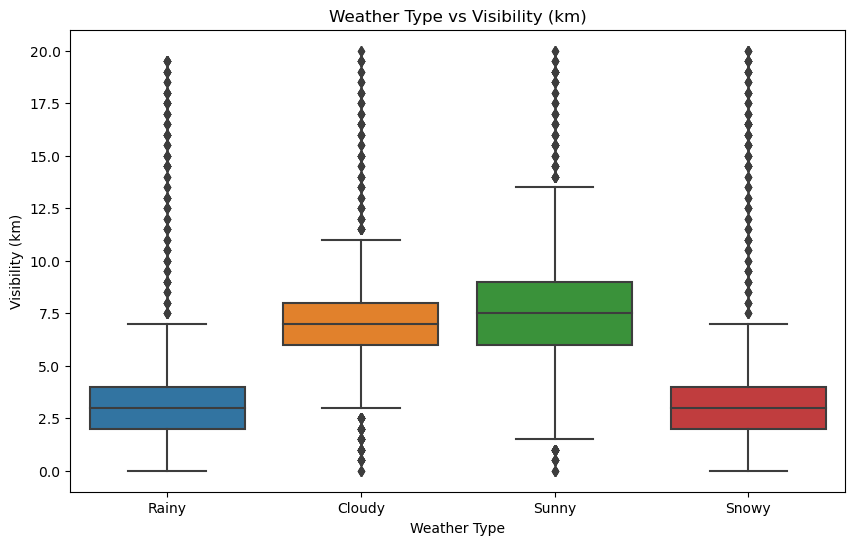

<Figure size 640x480 with 0 Axes>

In [66]:
# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
for feat in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Weather Type', y=feat, data=data)
    plt.title(f'Weather Type vs {feat}')
    plt.show()
plt.tight_layout()

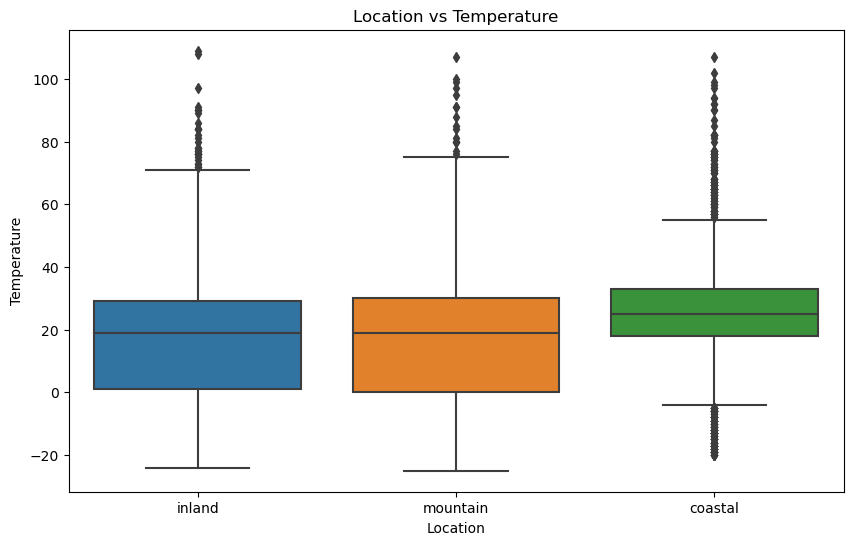

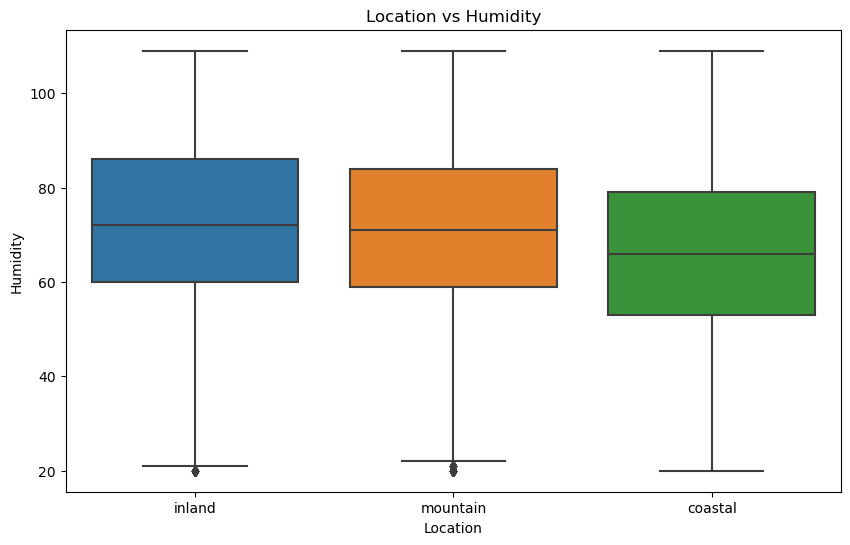

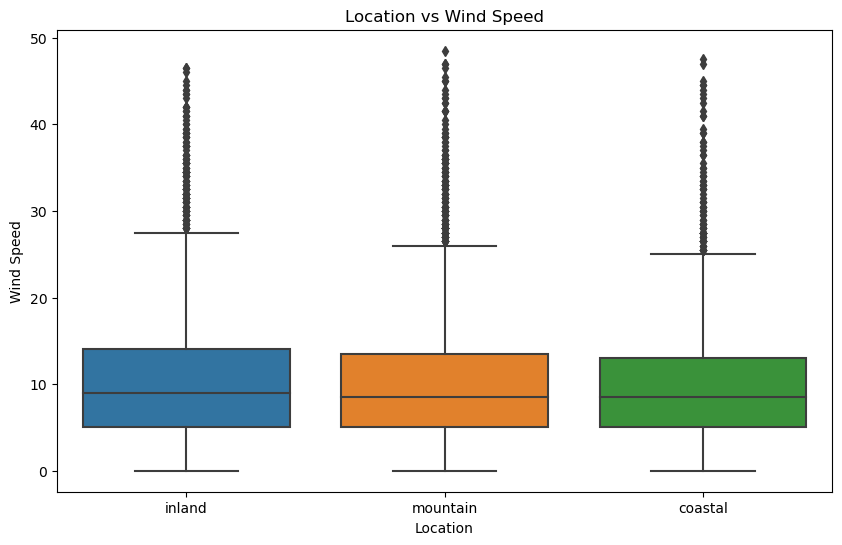

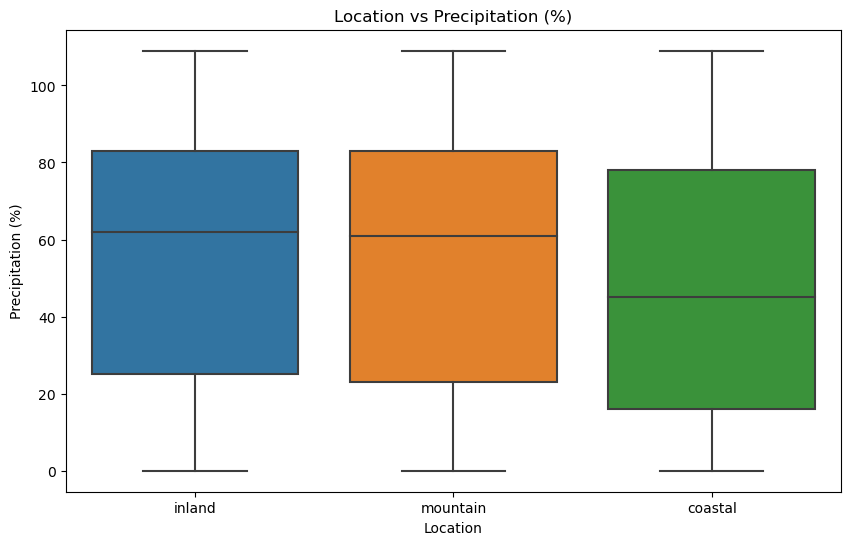

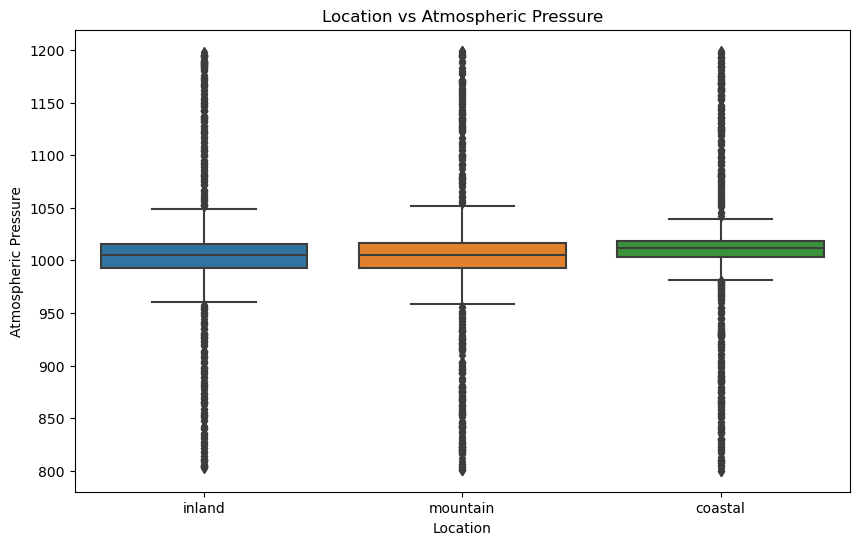

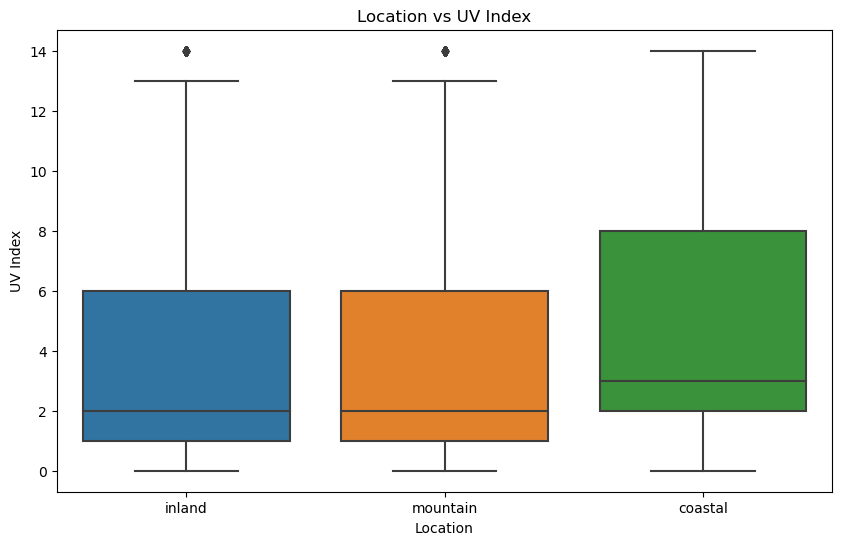

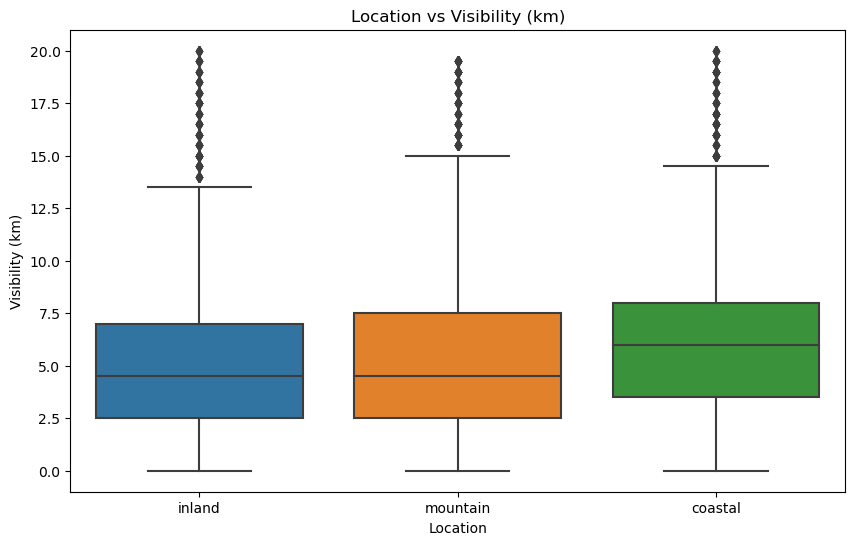

<Figure size 640x480 with 0 Axes>

In [67]:
# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
for feat in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Location', y=feat, data=data)
    plt.title(f'Location vs {feat}')
    plt.show()
plt.tight_layout()

# Analysis

## Feature Selection
Apply one-hot encoding and select the features to look at.

- **Categorical Encoding**: Convert categorical variables (Cloud Cover, Season, Location, Weather Type) into numerical format using one-hot encoding

- **Normalization**: Scale numerical features (Temperature, Humidity, Wind Speed, etc.) to have zero mean and unit variance using `StandardScaler`

In [9]:
categorical_features = ['Cloud Cover', 'Season', 'Location', 'Weather Type']
df_encoded = pd.get_dummies(data, columns=categorical_features)

In [10]:
scaler = StandardScaler()
numerical_features = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)']
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

# Apply PCA
Principal Component Analysis (PCA) helps in reducing the complexity of the data and visualizing it in lower dimensions, but interpretability of clusters may vary depending on the application.

- **PCA Dimensionality Reduction**: Apply PCA to reduce the dimensionality of the data to 2 principal components (`PC1` and `PC2`). Create a new DataFrame with principal components

- **K-Means**: Use K-means clustering on the reduced PCA-transformed data (`PC1` and `PC2`). Specify the number of clusters (`n_clusters`=3 in this example).

In [26]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_encoded[numerical_features])

In [27]:
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

In [28]:
kmeans = KMeans(n_clusters=3, random_state=0)
df_pca['Cluster'] = kmeans.fit_predict(df_pca)

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


# Evaluate
**Evaluation**: Compute the silhouette score to evaluate the quality of the clustering.

In [46]:
# Evaluate clustering
silhouette_avg = silhouette_score(df_encoded, df_encoded['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.2502782047212987


In [45]:
silhouette_avg = silhouette_score(principal_components, df_pca['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.4531411294248604


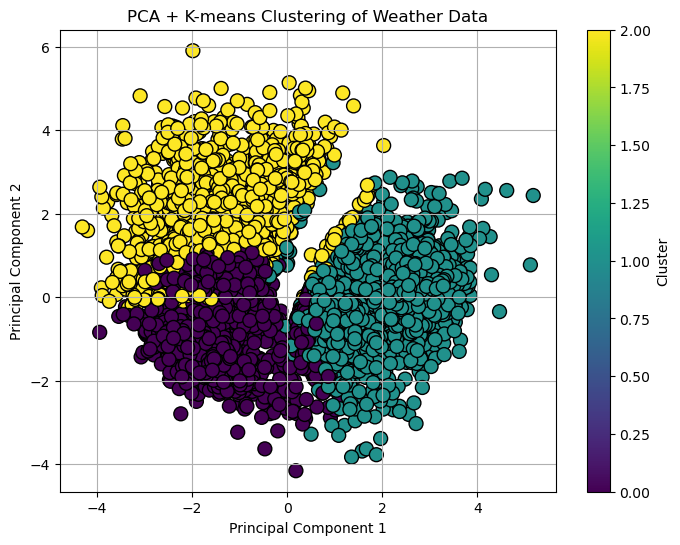

In [44]:
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=df_pca['Cluster'], cmap='viridis', edgecolor='k', s=100)
plt.title('PCA + K-means Clustering of Weather Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()